In [5]:
import pickle
import numpy as np
import tensorflow as tf
# load
with open('./data/dataset_optiver_CNN_LSTM.pickle', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train']
np.nan_to_num(X_train, copy=False)
X_val = data['X_val']
np.nan_to_num(X_val, copy=False)
X_test = data['X_test']
np.nan_to_num(X_test, copy=False)
y_train = data['y_train']
np.nan_to_num(y_train, copy=False)
y_val = data['y_val']
np.nan_to_num(y_val, copy=False)
y_test = data['y_test']
np.nan_to_num(y_test, copy=False)

# NumPy 배열을 TensorFlow 텐서로 변환
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)
X_val = tf.convert_to_tensor(X_val)
y_val = tf.convert_to_tensor(y_val)
X_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)

In [6]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# 가정: X는 3D 데이터 텐서
num_train = len(X_train)
num_val = len(X_val)
num_test = len(X_test)
data_shape = (200, 12)

# tf.reshape를 사용하여 데이터를 2D 행렬로 변환
X_train_reshaped = tf.reshape(X_train, (num_train, -1))
y_train_reshaped = tf.reshape(y_train, (num_train, -1))
X_val_reshaped = tf.reshape(X_val, (num_val, -1))
y_val_reshaped = tf.reshape(y_val, (num_val, -1))
X_test_reshaped = tf.reshape(X_test, (num_test, -1))
y_test_reshaped = tf.reshape(y_test, (num_test, -1))


In [12]:
X_test_reshaped

<tf.Tensor: shape=(165, 2400), dtype=float64, numpy=
array([[0.0000000e+00, 4.7800000e+02, 0.0000000e+00, ..., 1.0000810e+00,
        9.5404000e+03, 1.0000000e+00],
       [0.0000000e+00, 4.7800000e+02, 1.0000000e+01, ..., 1.0000810e+00,
        2.0613520e+04, 9.9998100e-01],
       [0.0000000e+00, 4.7800000e+02, 2.0000000e+01, ..., 1.0000810e+00,
        3.1280000e+04, 9.9993000e-01],
       ...,
       [0.0000000e+00, 4.8000000e+02, 5.2000000e+02, ..., 1.0021290e+00,
        1.9463052e+05, 1.0019820e+00],
       [0.0000000e+00, 4.8000000e+02, 5.3000000e+02, ..., 1.0021290e+00,
        2.1451332e+05, 1.0019930e+00],
       [0.0000000e+00, 4.8000000e+02, 5.4000000e+02, ..., 1.0024470e+00,
        3.0016756e+05, 1.0022740e+00]])>

In [2]:
q = (1,2,3,4,5)
q[1]

2

In [3]:
import public_timeseries_testing_util as optiver2023
env = optiver2023.make_env()
iter_test = env.iter_test()

In [4]:
counter = 0
for (test, revealed_targets, sample_prediction) in iter_test:
    if counter == 0:
        print(test.head(3))
        print(revealed_targets.head(3))
        print(sample_prediction.head(3))
    sample_prediction['target'] = 0
    env.predict(sample_prediction)
    counter += 1

   stock_id  date_id  seconds_in_bucket  imbalance_size  \
0         0      478                  0      3753451.43   
1         1      478                  0       985977.11   
2         2      478                  0       599128.74   

   imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                       -1         0.999875   11548975.43        NaN   
1                       -1         1.000245    3850033.97        NaN   
2                        1         1.000584    4359198.25        NaN   

   near_price  bid_price  bid_size  ask_price  ask_size  wap   row_id  
0         NaN   0.999875  22940.00   1.000050   9177.60  1.0  478_0_0  
1         NaN   0.999940   1967.90   1.000601  19692.00  1.0  478_0_1  
2         NaN   0.999918   4488.22   1.000636  34955.12  1.0  478_0_2  
   stock_id  date_id  seconds_in_bucket  revealed_target  revealed_date_id  \
0       0.0      478                  0        -2.310276             477.0   
1       1.0      478          

In [5]:
iter_test

<generator object MockApi.iter_test at 0x0000023240E46840>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [13]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


In [228]:
stock_0 = train_data[train_data['stock_id'] == 0]
stock_0

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
191,0,0,10,1299772.70,1,1.000026,15261106.63,NaN,NaN,0.999812,13996.50,1.000026,23519.16,0.999892,0.389814,1,0_10_0
382,0,0,20,1299772.70,1,0.999919,15261106.63,NaN,NaN,0.999812,4665.50,0.999919,12131.60,0.999842,4.220009,2,0_20_0
573,0,0,30,1299772.70,1,1.000133,15261106.63,NaN,NaN,1.000026,55998.00,1.000133,46203.30,1.000085,5.450249,3,0_30_0
764,0,0,40,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000241,14655.95,1.000455,26610.45,1.000317,3.169775,4,0_40_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236980,0,480,500,0.00,0,0.999017,42161928.97,0.999017,0.999017,0.999017,53827.20,0.999193,146071.08,0.999065,3.999472,26450,480_500_0
5237180,0,480,510,0.00,0,0.998842,42161928.97,0.998842,0.998842,0.998842,157865.40,0.999017,120926.08,0.998941,3.190041,26451,480_510_0
5237380,0,480,520,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,57596.67,0.999368,46780.58,0.999289,-0.169873,26452,480_520_0
5237580,0,480,530,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,156610.53,0.999368,122677.94,0.999291,3.110170,26453,480_530_0


<Axes: xlabel='target'>

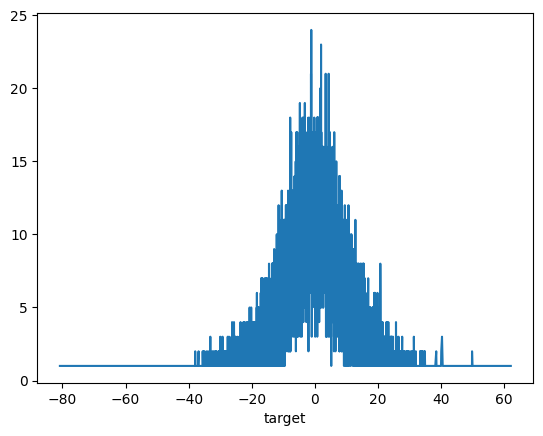

In [236]:
stock_1 = train_data[train_data['stock_id'] == 1]
stock_1.target.value_counts().sort_index().plot()

In [4]:
abs(stock_0['target'])

0          3.029704
191        0.389814
382        4.220009
573        5.450249
764        3.169775
             ...   
5236980    3.999472
5237180    3.190041
5237380    0.169873
5237580    3.110170
5237780    0.760555
Name: target, Length: 26455, dtype: float64

In [47]:
a = stock_0['imbalance_size']
b = stock_0['imbalance_buy_sell_flag']
a.values * b.values

array([3180602.69, 1299772.7 , 1299772.7 , ...,  475513.69,  475513.69,
        475513.69])

In [30]:
# save
with open('stock_0.pickle', 'wb') as f:
    pickle.dump(stock_0, f, pickle.HIGHEST_PROTOCOL)

<Axes: >

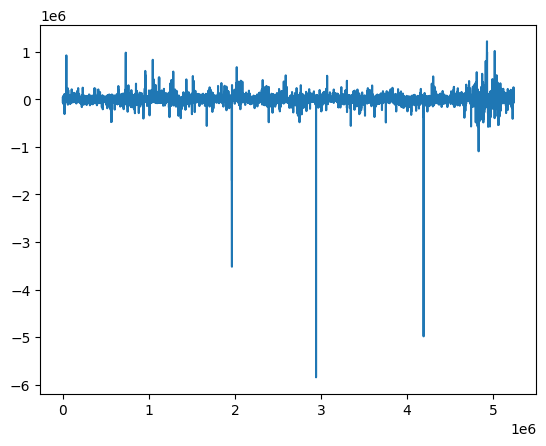

In [27]:
spread_size = (stock_0['ask_size'] - stock_0['bid_size'])
spread_size.name = 'spread_size'
spread_size.plot()

<Axes: >

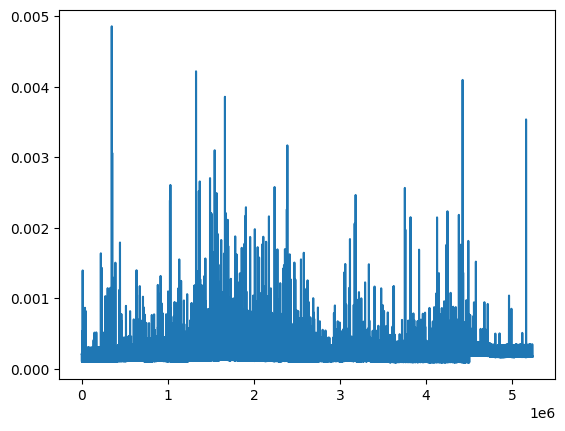

In [24]:
spread = (stock_0['ask_price'] - stock_0['bid_price'])
spread.name = 'spread'
target = stock_0['target']
df = pd.concat([spread,target],axis=1)
spread.plot()

<Axes: >

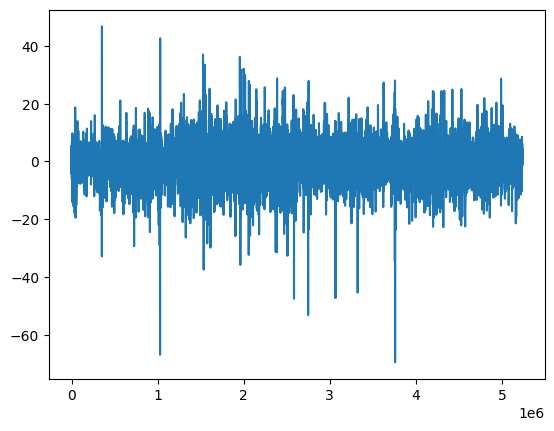

In [25]:
target.plot()

<Axes: xlabel='date_id'>

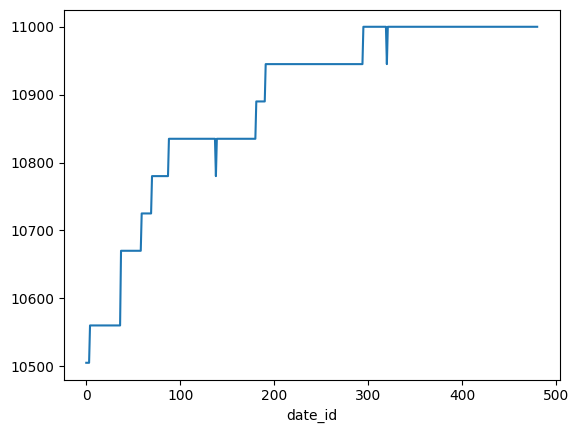

In [8]:
train_data['date_id'].value_counts().sort_index().plot()

<Axes: xlabel='stock_id'>

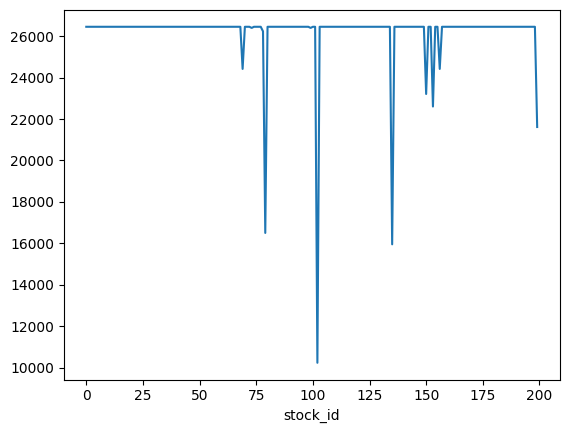

In [10]:
train_data['stock_id'].value_counts().sort_index().plot()

In [34]:
for i in range(0,481):
    if len(train_data[train_data['date_id']==i]) == 11000:
        print(i)

295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480


In [37]:
train_data[train_data['date_id']==320]

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
3467035,0,320,0,4417666.29,1,0.999898,8100871.38,NaN,NaN,0.999898,4909.00,1.000102,4910.00,1.0,5.979538,17600,320_0_0
3467036,1,320,0,2292598.14,1,0.999078,549875.83,NaN,NaN,0.997939,946.38,1.000343,158.11,1.0,-9.130240,17600,320_0_1
3467037,2,320,0,494673.75,-1,0.998838,1263836.54,NaN,NaN,0.998299,44584.12,1.000051,1335.42,1.0,-10.690093,17600,320_0_2
3467038,3,320,0,3940684.33,-1,0.999823,36341254.47,NaN,NaN,0.999681,11014.64,1.000625,21626.04,1.0,9.360313,17600,320_0_3
3467039,4,320,0,4404356.42,1,1.000581,5972996.16,NaN,NaN,0.999985,150.93,1.000448,4379.00,1.0,10.190010,17600,320_0_4
3467040,5,320,0,850406.29,-1,1.000193,3460077.11,NaN,NaN,0.999985,479.50,1.000193,6042.96,1.0,-7.770061,17600,320_0_5
3467041,6,320,0,31262292.06,-1,1.000235,5099010.83,NaN,NaN,0.997383,83386.70,1.000203,6479.97,1.0,-10.849834,17600,320_0_6
3467042,7,320,0,7652980.63,-1,0.999547,22786799.86,NaN,NaN,0.999547,20896.67,1.000963,44524.00,1.0,-4.270077,17600,320_0_7
3467043,8,320,0,2241613.22,-1,0.999718,17597780.86,NaN,NaN,0.999718,37225.60,1.000620,81970.24,1.0,3.390312,17600,320_0_8
3467044,9,320,0,6076.16,-1,0.999681,7525820.74,NaN,NaN,0.999681,7343.46,1.000012,272.07,1.0,9.670258,17600,320_0_9


In [12]:
a = train_data['target'].value_counts().sort_index()#.plot()
a[abs(a.index)<5].sum()

2842889

In [23]:
q1_list = []
for i in range(0,200):
    q1 = float(train_data.query(f'stock_id=={i}').target.quantile(q=0.1, interpolation='nearest'))
    q1_list.append(q1)
q1

-10.250211

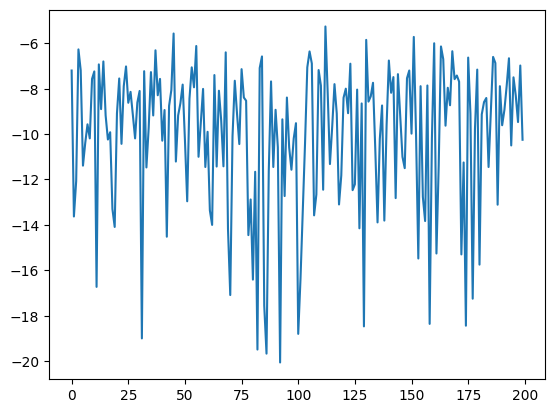

In [24]:
plt.plot(q1_list)

In [9]:
a.sum()

5237892

<Axes: xlabel='target'>

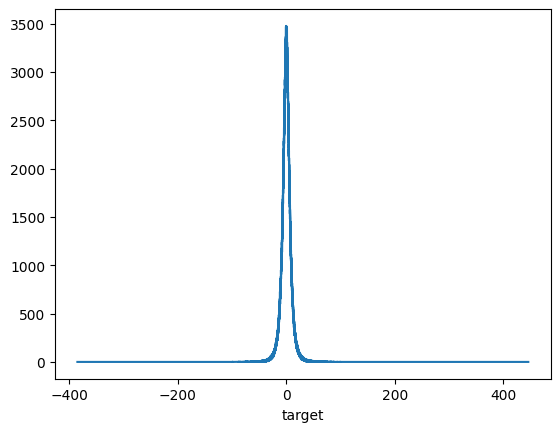

In [7]:
a.plot()

<Axes: xlabel='stock_id'>

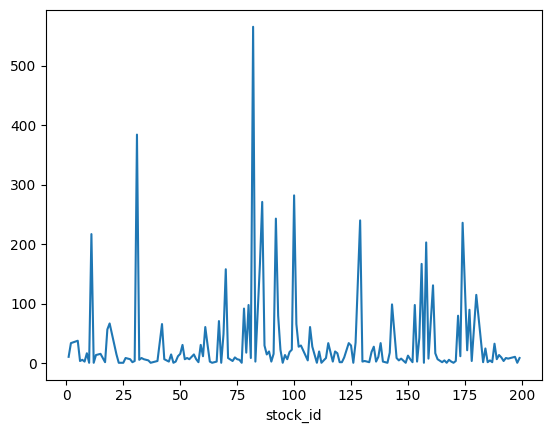

In [54]:
a = train_data[train_data['target']>=50]['stock_id'].value_counts().sort_index()
a.plot()

In [59]:
train_data[train_data['target']>=50]['stock_id'].value_counts().sort_index()

stock_id
1      11
2      34
5      38
6       4
7       6
       ..
193     9
194     8
197    11
198     1
199     9
Name: count, Length: 166, dtype: int64

In [33]:
train_data[train_data['target']<=-50]

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
1121,174,0,50,538639.64,-1,1.003146,1152542.32,NaN,NaN,1.002992,17230.30,1.004534,11851.84,1.003906,-54.000020,5,0_50_174
1312,174,0,60,534750.08,-1,1.002683,1156431.89,NaN,NaN,1.002529,1169.82,1.003917,6508.00,1.002741,-50.250290,6,0_60_174
5240,86,0,270,0.00,0,1.011856,2335703.84,NaN,NaN,1.010948,15241.80,1.012839,13395.00,1.011955,-59.540270,27,0_270_86
5622,86,0,290,0.00,0,1.013217,3133845.10,NaN,NaN,1.013065,3483.48,1.014275,1341.40,1.013939,-60.200096,29,0_290_86
5813,86,0,300,0.00,0,1.011667,4200987.07,1.011667,1.011667,1.010948,3476.20,1.012839,133.95,1.012769,-51.530003,30,0_300_86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232040,60,480,250,83746452.96,-1,1.000131,8432574.88,NaN,NaN,1.000131,3805.88,1.000336,14641.00,1.000174,-58.190228,26425,480_250_60
5232240,60,480,260,83242825.61,-1,1.000131,9007333.57,NaN,NaN,1.000131,2927.60,1.000336,7759.73,1.000188,-65.180060,26426,480_260_60
5232440,60,480,270,82613035.28,-1,1.000541,9668445.10,NaN,NaN,1.000336,439.23,1.000473,3514.32,1.000352,-74.440240,26427,480_270_60
5232640,60,480,280,79385634.28,-1,0.999653,16895592.80,NaN,NaN,0.999243,14625.00,1.000131,14638.00,0.999687,-72.960260,26428,480_280_60


In [76]:
stock_0

,imbalance_size,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,target
0,3180602.69,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,-3.029704
1,1299772.70,1.000026,15261106.63,NaN,NaN,0.999812,13996.50,1.000026,23519.16,0.389814
2,1299772.70,0.999919,15261106.63,NaN,NaN,0.999812,4665.50,0.999919,12131.60,4.220009
3,1299772.70,1.000133,15261106.63,NaN,NaN,1.000026,55998.00,1.000133,46203.30,5.450249
4,1218204.43,1.000455,15342674.90,NaN,NaN,1.000241,14655.95,1.000455,26610.45,3.169775
...,...,...,...,...,...,...,...,...,...,...
26450,0.00,0.999017,42161928.97,0.999017,0.999017,0.999017,53827.20,0.999193,146071.08,3.999472
26451,0.00,0.998842,42161928.97,0.998842,0.998842,0.998842,157865.40,0.999017,120926.08,3.190041
26452,-475513.69,0.999193,41686415.27,0.999017,0.999017,0.999193,57596.67,0.999368,46780.58,-0.169873
26453,-475513.69,0.999193,41686415.27,0.999017,0.999017,0.999193,156610.53,0.999368,122677.94,3.110170


# LR

In [166]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

In [167]:
# load
with open('stock_0.pickle', 'rb') as f:
    stock_0 = pickle.load(f)

In [168]:
a = stock_0['imbalance_size']
b = stock_0['imbalance_buy_sell_flag']
stock_0['imbalance_size'] = a*b

In [169]:
stock_0 = stock_0.drop(columns=['stock_id','date_id','seconds_in_bucket','imbalance_buy_sell_flag', 'wap', 'time_id','row_id','ask_price','reference_price','near_price'])

In [170]:
state_matrix_0 = pd.DataFrame()
state_matrix_0['target'] = stock_0.target
#state_matrix_0['state_j'] = stock_0.target.shift(-1)
state_matrix_0 = state_matrix_0.reset_index(drop=True)
state_matrix_0

,target
0,-3.029704
1,0.389814
2,4.220009
3,5.450249
4,3.169775
...,...
26450,3.999472
26451,3.190041
26452,-0.169873
26453,3.110170


In [171]:
state_matrix_0.iloc[1].values

array([0.38981438])

In [172]:
state_list = np.array([])
#state_list = np.append(state_list, 1)
for i in range(len(state_matrix_0)):
    target = state_matrix_0.iloc[i].values
    if target <= -20 :
        state = 5
    elif target >= 20 :
        state = 4
    elif target > -20 and target <= -5 :
        state = 3
    elif target > -5 and target <= 0 :
        state = 1
    elif target > 0 and target <= 5 :
        state = 0
    elif target > 5 and target < 20 :
        state = 2
    state_list = np.append(state_list, state)

state_matrix_0['state_i'] = state_list

In [173]:
state_matrix_0['state_j'] = state_matrix_0.state_i.shift(-1)
state_matrix_0.drop(columns=['target'], inplace=True)

In [174]:
state_matrix_0.dropna(inplace=True)

In [175]:
stock_0

,imbalance_size,matched_size,far_price,bid_price,bid_size,ask_size,target
0,3180602.69,13380276.64,NaN,0.999812,60651.50,8493.03,-3.029704
191,1299772.70,15261106.63,NaN,0.999812,13996.50,23519.16,0.389814
382,1299772.70,15261106.63,NaN,0.999812,4665.50,12131.60,4.220009
573,1299772.70,15261106.63,NaN,1.000026,55998.00,46203.30,5.450249
764,1218204.43,15342674.90,NaN,1.000241,14655.95,26610.45,3.169775
...,...,...,...,...,...,...,...
5236980,0.00,42161928.97,0.999017,0.999017,53827.20,146071.08,3.999472
5237180,0.00,42161928.97,0.998842,0.998842,157865.40,120926.08,3.190041
5237380,-475513.69,41686415.27,0.999017,0.999193,57596.67,46780.58,-0.169873
5237580,-475513.69,41686415.27,0.999017,0.999193,156610.53,122677.94,3.110170


In [176]:
state_matrix_0

,state_i,state_j
0,1.0,0.0
1,0.0,0.0
2,0.0,2.0
3,2.0,0.0
4,0.0,0.0
...,...,...
26449,0.0,0.0
26450,0.0,0.0
26451,0.0,1.0
26452,1.0,0.0


In [177]:
state_matrix_0.state_i.value_counts()

state_i
1.0    8978
0.0    8922
3.0    4430
2.0    3915
5.0     121
4.0      88
Name: count, dtype: int64

In [182]:
for j in range(6):
    print(len(state_matrix_0.query(f'state_i == {j}')))

8922
8978
3915
4430
88
121


In [192]:
p_matrix_0 = []
state = [0,1,2,3,4,5]

for i in state:
    #print(i)
    p_row = []
    denominator = state_matrix_0.state_i.value_counts().sort_index().values[i] # the number of state i
    sum_num = 0
    for j in state:
        numerator = len(state_matrix_0.query(f'state_i == {i} and state_j =={j}'))
        sum_num += numerator
        conditional_prob = numerator/denominator
        p_row.append(round(conditional_prob,2))
    
    #print(denominator, sum_num)
    #print(sum(np.array(p_row)))
    
    p_matrix_0.append(p_row)
    

In [193]:
p_matrix_0 = np.array(p_matrix_0)
p_matrix_0*100

array([[58., 26., 13.,  2.,  0.,  0.],
       [26., 57.,  2., 14.,  0.,  0.],
       [31.,  6., 61.,  1.,  1.,  0.],
       [ 5., 29.,  1., 64.,  0.,  1.],
       [ 6.,  1., 50.,  1., 42.,  0.],
       [ 1.,  3.,  2., 40.,  0., 55.]])

In [195]:
predictions = []

for i in range(len(state_matrix_0)):
    state_i = state_matrix_0.state_i.iloc[i]
    if state_i == 0:
        prediction = 0
    elif state_i == 1:
        prediction = 1
    elif state_i == 2:
        prediction = 2
    elif state_i == 3:
        prediction = 3
    elif state_i == 4:
        prediction = 2
    elif state_i == 5:
        prediction = 5
    predictions.append(prediction)

state_matrix_0['predictions'] = predictions

In [215]:
total = len(state_matrix_0)
correct = state_matrix_0.query('state_j == predictions')
incorrect = state_matrix_0.query('state_j != predictions')
correct_num = len(correct)
incorrect_num = len(incorrect)

correct['state_j'].value_counts(), incorrect['state_j'].value_counts()

(state_j
 0.0    5185
 1.0    5155
 3.0    2818
 2.0    2447
 5.0      66
 Name: count, dtype: int64,
 state_j
 1.0    3822
 0.0    3738
 3.0    1612
 2.0    1468
 4.0      88
 5.0      55
 Name: count, dtype: int64)

In [227]:
state_matrix_0

,state_i,state_j,predictions
0,1.0,0.0,1
1,0.0,0.0,0
2,0.0,2.0,0
3,2.0,0.0,2
4,0.0,0.0,0
...,...,...,...
26449,0.0,0.0,0
26450,0.0,0.0,0
26451,0.0,1.0,0
26452,1.0,0.0,1


<Axes: xlabel='target'>

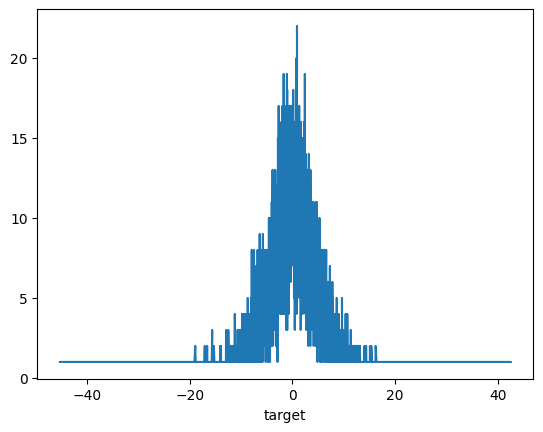

In [24]:
stock_0.target.value_counts().sort_index().plot()

In [223]:
print(type(stock_0.target.quantile(q=0.01, interpolation='nearest')))
print(stock_0.target.quantile(q=0.1, interpolation='nearest'))
print(stock_0.target.quantile(q=0.5, interpolation='nearest'))
print(stock_0.target.quantile(q=0.8, interpolation='nearest'))
print(stock_0.target.quantile(q=0.99, interpolation='nearest')) 

<class 'numpy.float64'>
-7.200241
-0.12993813
3.9505959
15.120506


In [226]:
[-10] <= stock_0.target.quantile(q=0.1, interpolation='nearest')

array([ True])

<Axes: >

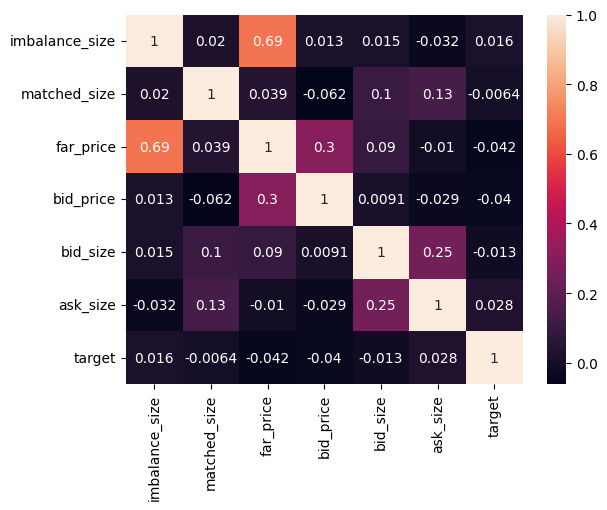

In [9]:
corr = stock_0.corr()
sns.heatmap(corr, annot=True)

In [10]:
stock_0 = stock_0.dropna()
y = stock_0['target']
X = stock_0.drop(columns=['target'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
X_train

,imbalance_size,matched_size,far_price,bid_price,bid_size,ask_size
3101689,-2860334.24,18909769.00,0.970203,0.996523,36138.20,3048.50
238628,-1711276.71,19149247.91,0.985471,1.000421,25108.90,14363.37
2303898,-222000.45,27525053.72,0.999739,1.000178,28483.00,73263.05
1766964,745890.11,19065341.53,1.001237,0.998611,9104.04,25401.84
602154,2474925.36,36592117.59,1.003823,0.999473,3825.45,36983.70
...,...,...,...,...,...,...
4947980,-3618151.06,26863532.56,0.997532,0.998920,113873.46,185810.66
2260715,0.00,27832887.41,0.993521,0.993296,153030.90,5196.13
2348076,-1975342.42,39115491.76,1.001396,1.002462,29599.50,79345.42
375332,-1330164.78,13351755.78,0.977089,0.997934,17740.56,33094.80


In [13]:
scale = StandardScaler()
X_train_sc = scale.fit_transform(X_train)
X_test_sc = scale.transform(X_test)
X_train[X_train.columns] = X_train_sc
X_test[X_test.columns] = X_test_sc

In [14]:
X_train

,imbalance_size,matched_size,far_price,bid_price,bid_size,ask_size
3101689,-0.640764,-0.630111,-1.603575,-1.547547,-0.186389,-0.667615
238628,-0.305785,-0.620064,-0.689395,0.363083,-0.318748,-0.521282
2303898,0.128376,-0.268685,0.164910,0.243975,-0.278256,0.240458
1766964,0.410540,-0.623584,0.254603,-0.524100,-0.510817,-0.378523
602154,0.914597,0.111693,0.409442,-0.101585,-0.574164,-0.228737
...,...,...,...,...,...,...
4947980,-0.861687,-0.296437,0.032764,-0.372642,0.746487,1.696018
2260715,0.193095,-0.255771,-0.207397,-3.129282,1.216402,-0.639840
2348076,-0.382767,0.217553,0.264124,1.363492,-0.264858,0.319121
375332,-0.194682,-0.863279,-1.191272,-0.855936,-0.407173,-0.279031


In [15]:
y_train

3101689    1.089573
238628    -0.630021
2303898   -8.249879
1766964    5.880594
602154     3.130436
             ...   
4947980   -7.849932
2260715    4.249811
2348076   -7.190108
375332    -1.230240
3179100    5.960464
Name: target, Length: 7998, dtype: float64

In [16]:
X_train

,imbalance_size,matched_size,far_price,bid_price,bid_size,ask_size
3101689,-0.640764,-0.630111,-1.603575,-1.547547,-0.186389,-0.667615
238628,-0.305785,-0.620064,-0.689395,0.363083,-0.318748,-0.521282
2303898,0.128376,-0.268685,0.164910,0.243975,-0.278256,0.240458
1766964,0.410540,-0.623584,0.254603,-0.524100,-0.510817,-0.378523
602154,0.914597,0.111693,0.409442,-0.101585,-0.574164,-0.228737
...,...,...,...,...,...,...
4947980,-0.861687,-0.296437,0.032764,-0.372642,0.746487,1.696018
2260715,0.193095,-0.255771,-0.207397,-3.129282,1.216402,-0.639840
2348076,-0.382767,0.217553,0.264124,1.363492,-0.264858,0.319121
375332,-0.194682,-0.863279,-1.191272,-0.855936,-0.407173,-0.279031


In [18]:
X_test

,imbalance_size,matched_size,far_price,bid_price,bid_size,ask_size
3033830,-2.929309,0.465278,-2.724027,1.225758,-0.567407,-0.591188
3671780,-0.001421,-0.263184,-0.211229,0.381219,-0.476410,-0.616501
3452835,-0.824124,0.228428,-0.015316,0.106731,0.508052,0.783388
157796,0.642627,-0.225506,0.077791,-0.886816,0.656704,-0.451838
1637535,0.423703,-0.159578,0.742170,0.852259,-0.205210,-0.003129
...,...,...,...,...,...,...
2158827,-1.801216,0.258739,-3.207283,-3.286622,-0.505034,-0.462359
4034180,0.622696,-0.233924,1.041249,0.896863,-0.213758,-0.271760
1856599,0.193095,-0.111471,0.141079,-0.285884,-0.325467,-0.514384
4980380,2.300282,-0.224141,1.988001,0.089085,-0.196299,0.119173


<Axes: >

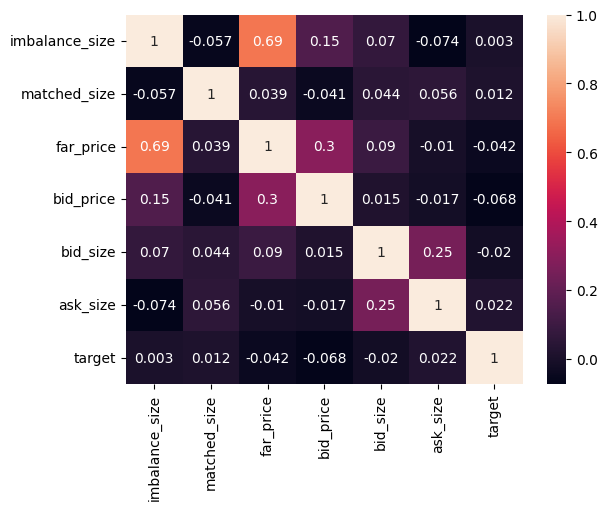

In [19]:
corr = stock_0.corr()
sns.heatmap(corr, annot=True)

In [20]:
# X_1 = sm.add_constant(X_1, has_constant = 'add')  # 상수항 추가
lin_model_1 = sm.OLS(y_train, X_train)
lin_model_1 = lin_model_1.fit()

In [21]:
lin_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):              0.008
Method:                 Least Squares   F-statistic:                              11.61
Date:                Tue, 07 Nov 2023   Prob (F-statistic):                    5.53e-13
Time:                        10:36:00   Log-Likelihood:                         -24422.
No. Observations:                7998   AIC:                                  4.886e+04
Df Residuals:                    7992   BIC:                                  4.890e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
imbalance_size     0.3324      0.082      4.053      0.000       0.172       0.493
matched_size       0.0270      0.058      0.465      0.642      -0.087       0.141
far_price         -0.3501      0.085     -4.130      0.000      -0.516      -0.184
bid_price         -0.3303      0.060     -5.464      0.000      -0.449      -0.212
bid_size          -0.0516      0.060     -0.861      0.389      -0.169       0.066
ask_size           0.1374      0.060      2.293      0.022       0.020       0.255
==============================================================================
Omnibus:                      825.740   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6944.023
Skew:                           0.055   Prob(JB):                         0.00
Kurtosis:                       7.563   Cond. No.                         2.61
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Estimate Index

In [166]:
stock_0

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
191,0,0,10,1299772.70,1,1.000026,15261106.63,NaN,NaN,0.999812,13996.50,1.000026,23519.16,0.999892,0.389814,1,0_10_0
382,0,0,20,1299772.70,1,0.999919,15261106.63,NaN,NaN,0.999812,4665.50,0.999919,12131.60,0.999842,4.220009,2,0_20_0
573,0,0,30,1299772.70,1,1.000133,15261106.63,NaN,NaN,1.000026,55998.00,1.000133,46203.30,1.000085,5.450249,3,0_30_0
764,0,0,40,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000241,14655.95,1.000455,26610.45,1.000317,3.169775,4,0_40_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236980,0,480,500,0.00,0,0.999017,42161928.97,0.999017,0.999017,0.999017,53827.20,0.999193,146071.08,0.999065,3.999472,26450,480_500_0
5237180,0,480,510,0.00,0,0.998842,42161928.97,0.998842,0.998842,0.998842,157865.40,0.999017,120926.08,0.998941,3.190041,26451,480_510_0
5237380,0,480,520,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,57596.67,0.999368,46780.58,0.999289,-0.169873,26452,480_520_0
5237580,0,480,530,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,156610.53,0.999368,122677.94,0.999291,3.110170,26453,480_530_0


In [173]:
target = stock_0['target']
wap = stock_0['wap']
wap_60 = wap.shift(6)

<Axes: >

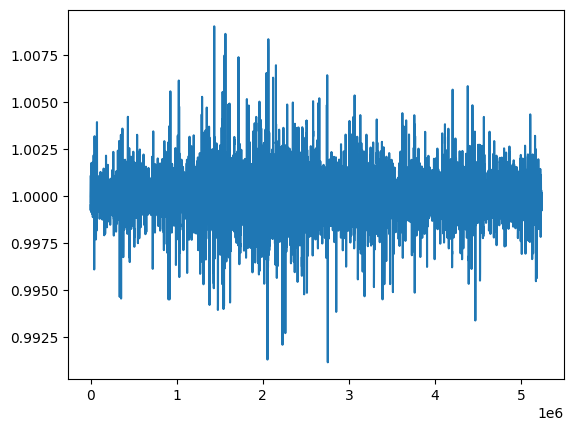

In [177]:
wap_ratio = wap_60/wap
index_ratio = wap_ratio - (target/10000)
index_ratio.plot()

In [185]:
sum(index_ratio.fillna(0)), sum(wap_ratio.fillna(0)), sum(target/10000)

(26449.711229827433, 26449.019654121163, -0.6904957298407027)

<Axes: >

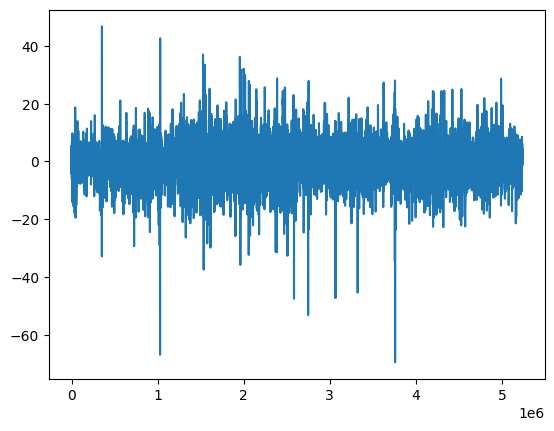

In [179]:
target.plot()

<Axes: >

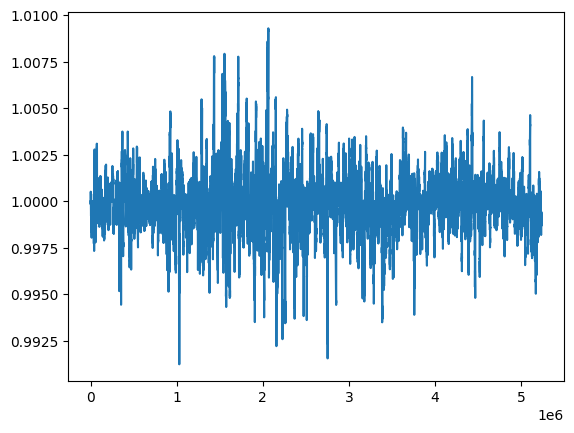

In [180]:
wap.plot()

In [187]:
stock_0['index_ratio'] = index_ratio
stock_0

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,index_ratio
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0,NaN
191,0,0,10,1299772.70,1,1.000026,15261106.63,NaN,NaN,0.999812,13996.50,1.000026,23519.16,0.999892,0.389814,1,0_10_0,NaN
382,0,0,20,1299772.70,1,0.999919,15261106.63,NaN,NaN,0.999812,4665.50,0.999919,12131.60,0.999842,4.220009,2,0_20_0,NaN
573,0,0,30,1299772.70,1,1.000133,15261106.63,NaN,NaN,1.000026,55998.00,1.000133,46203.30,1.000085,5.450249,3,0_30_0,NaN
764,0,0,40,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000241,14655.95,1.000455,26610.45,1.000317,3.169775,4,0_40_0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236980,0,480,500,0.00,0,0.999017,42161928.97,0.999017,0.999017,0.999017,53827.20,0.999193,146071.08,0.999065,3.999472,26450,480_500_0,0.999213
5237180,0,480,510,0.00,0,0.998842,42161928.97,0.998842,0.998842,0.998842,157865.40,0.999017,120926.08,0.998941,3.190041,26451,480_510_0,0.999652
5237380,0,480,520,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,57596.67,0.999368,46780.58,0.999289,-0.169873,26452,480_520_0,1.000157
5237580,0,480,530,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,156610.53,0.999368,122677.94,0.999291,3.110170,26453,480_530_0,0.999692


In [190]:
stock_0[abs(stock_0['target'])<=5]

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,index_ratio
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0,NaN
191,0,0,10,1299772.70,1,1.000026,15261106.63,NaN,NaN,0.999812,13996.50,1.000026,23519.16,0.999892,0.389814,1,0_10_0,NaN
382,0,0,20,1299772.70,1,0.999919,15261106.63,NaN,NaN,0.999812,4665.50,0.999919,12131.60,0.999842,4.220009,2,0_20_0,NaN
764,0,0,40,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000241,14655.95,1.000455,26610.45,1.000317,3.169775,4,0_40_0,NaN
955,0,0,50,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000348,42012.00,1.000455,9897.22,1.000434,0.599623,5,0_50_0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236980,0,480,500,0.00,0,0.999017,42161928.97,0.999017,0.999017,0.999017,53827.20,0.999193,146071.08,0.999065,3.999472,26450,480_500_0,0.999213
5237180,0,480,510,0.00,0,0.998842,42161928.97,0.998842,0.998842,0.998842,157865.40,0.999017,120926.08,0.998941,3.190041,26451,480_510_0,0.999652
5237380,0,480,520,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,57596.67,0.999368,46780.58,0.999289,-0.169873,26452,480_520_0,1.000157
5237580,0,480,530,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,156610.53,0.999368,122677.94,0.999291,3.110170,26453,480_530_0,0.999692


In [199]:
stock_0.head(6)

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,index_ratio
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0,NaN
191,0,0,10,1299772.70,1,1.000026,15261106.63,NaN,NaN,0.999812,13996.50,1.000026,23519.16,0.999892,0.389814,1,0_10_0,NaN
382,0,0,20,1299772.70,1,0.999919,15261106.63,NaN,NaN,0.999812,4665.50,0.999919,12131.60,0.999842,4.220009,2,0_20_0,NaN
573,0,0,30,1299772.70,1,1.000133,15261106.63,NaN,NaN,1.000026,55998.00,1.000133,46203.30,1.000085,5.450249,3,0_30_0,NaN
764,0,0,40,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000241,14655.95,1.000455,26610.45,1.000317,3.169775,4,0_40_0,NaN
955,0,0,50,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000348,42012.00,1.000455,9897.22,1.000434,0.599623,5,0_50_0,NaN


In [204]:
stock_0.iloc[55:]

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,index_ratio
10505,0,1,0,1870169.40,1,0.999923,5132566.71,NaN,NaN,0.999601,9302.00,1.000998,23287.50,1.000000,-14.089942,55,1_0_0,1.000751
10696,0,1,10,1112218.97,1,0.999278,5890517.14,NaN,NaN,0.999064,8088.39,0.999493,23252.50,0.999175,-3.079772,56,1_10_0,1.000558
10887,0,1,20,937829.89,1,0.998634,6064906.23,NaN,NaN,0.998419,5574.60,0.998634,52412.52,0.998439,2.540350,57,1_20_0,1.000888
11078,0,1,30,937829.89,1,0.998204,6064906.23,NaN,NaN,0.997989,14673.46,0.998204,41800.50,0.998045,2.390146,58,1_30_0,1.001145
11269,0,1,40,937829.89,1,0.998634,6064906.23,NaN,NaN,0.998419,4738.41,0.998634,4646.50,0.998527,-0.540018,59,1_40_0,1.000983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236980,0,480,500,0.00,0,0.999017,42161928.97,0.999017,0.999017,0.999017,53827.20,0.999193,146071.08,0.999065,3.999472,26450,480_500_0,0.999213
5237180,0,480,510,0.00,0,0.998842,42161928.97,0.998842,0.998842,0.998842,157865.40,0.999017,120926.08,0.998941,3.190041,26451,480_510_0,0.999652
5237380,0,480,520,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,57596.67,0.999368,46780.58,0.999289,-0.169873,26452,480_520_0,1.000157
5237580,0,480,530,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,156610.53,0.999368,122677.94,0.999291,3.110170,26453,480_530_0,0.999692


In [206]:
stock_0.columns

Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price',
       'ask_size', 'wap', 'target', 'time_id', 'row_id', 'index_ratio'],
      dtype='object')

In [194]:
corr = stock_0[abs(stock_0['target'])<=5].corr()
corr['target'].sort_values(ascending=False)

target                     1.000000
ask_size                   0.018399
imbalance_buy_sell_flag    0.010504
seconds_in_bucket          0.007208
bid_size                  -0.004412
matched_size              -0.005250
row_id                    -0.005364
far_price                 -0.010752
near_price                -0.011230
imbalance_size            -0.011408
time_id                   -0.016365
date_id                   -0.016380
reference_price           -0.022124
bid_price                 -0.023809
ask_price                 -0.024372
wap                       -0.026140
index_ratio               -0.248224
stock_id                        NaN
Name: target, dtype: float64

<Axes: >

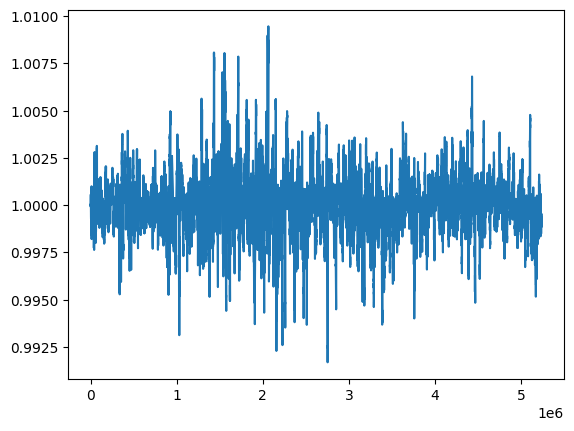

In [197]:
stock_0['ask_price'].plot()

## Preprocessing for CNN-LSTM

In [23]:
raw_data = pd.read_csv('train.csv')

In [27]:
raw_data = raw_data.drop(columns=['far_price','near_price','time_id','row_id']).dropna()

In [28]:
train_data = raw_data.query('date_id < 478')
test_data = raw_data.query('date_id >= 478')

X_data = train_data.drop(columns=['target'])
y_data = train_data['target']

X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

In [29]:
train_data

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,bid_price,bid_size,ask_price,ask_size,wap,target
0,0,0,0,3180602.69,1,0.999812,13380276.64,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704
1,1,0,0,166603.91,-1,0.999896,1642214.25,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986
2,2,0,0,302879.87,-1,0.999561,1819368.03,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950
3,3,0,0,11917682.27,-1,1.000171,18389745.62,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200
4,4,0,0,447549.96,-1,0.999532,17860614.95,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204975,195,477,540,2809393.38,-1,1.002359,35296955.75,1.002359,424927.60,1.002482,326361.57,1.002429,-3.190041
5204976,196,477,540,1236161.74,-1,0.998663,8814158.85,0.998663,36276.52,0.999168,95031.58,0.998803,-6.200075
5204977,197,477,540,509422.85,1,0.997623,10364257.03,0.997240,20846.00,0.997623,27527.28,0.997405,0.000000
5204978,198,477,540,5724317.95,-1,0.999832,63738563.90,0.999712,538354.70,0.999952,967689.35,0.999797,1.300573


In [32]:
X = train_data.query('date_id==0 and seconds_in_bucket==0')
len(X)

191

In [41]:
X

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,bid_price,bid_size,ask_price,ask_size,wap,target
0,0,0,0,3180602.69,1,0.999812,13380276.64,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704
1,1,0,0,166603.91,-1,0.999896,1642214.25,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986
2,2,0,0,302879.87,-1,0.999561,1819368.03,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950
3,3,0,0,11917682.27,-1,1.000171,18389745.62,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200
4,4,0,0,447549.96,-1,0.999532,17860614.95,0.999394,16485.54,1.000016,434.10,1.0,-7.349849
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,194,0,0,204354.91,1,1.000368,1404914.52,0.999780,13598.00,1.000662,40966.10,1.0,3.999472
187,195,0,0,1966495.44,1,0.999759,10618721.53,0.999872,37591.25,1.000098,28752.75,1.0,-0.690222
188,196,0,0,0.00,0,1.000144,4791323.74,0.999844,7338.10,1.000144,6806.46,1.0,-0.810027
189,197,0,0,42803.43,-1,0.999836,3111327.21,0.999625,21535.36,1.000119,6804.00,1.0,-8.440018


In [56]:
for id in range(0,200):
    if id in X.stock_id.values:
        continue
    else:
        new_row = pd.DataFrame([[id,0,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]],columns = X.columns)
        X = pd.concat([X,new_row])

X = X.sort_values('stock_id').reset_index(drop=True)
X

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,bid_price,bid_size,ask_price,ask_size,wap,target
0,0,0,0,3180602.69,1.0,0.999812,13380276.64,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704
1,1,0,0,166603.91,-1.0,0.999896,1642214.25,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986
2,2,0,0,302879.87,-1.0,0.999561,1819368.03,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950
3,3,0,0,11917682.27,-1.0,1.000171,18389745.62,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200
4,4,0,0,447549.96,-1.0,0.999532,17860614.95,0.999394,16485.54,1.000016,434.10,1.0,-7.349849
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0,0,1966495.44,1.0,0.999759,10618721.53,0.999872,37591.25,1.000098,28752.75,1.0,-0.690222
196,196,0,0,0.00,0.0,1.000144,4791323.74,0.999844,7338.10,1.000144,6806.46,1.0,-0.810027
197,197,0,0,42803.43,-1.0,0.999836,3111327.21,0.999625,21535.36,1.000119,6804.00,1.0,-8.440018
198,198,0,0,15249373.90,1.0,0.999775,26134518.94,0.999946,54300.05,1.000117,118264.58,1.0,-0.510216


In [31]:
for i in range(0,478):
    for j in range(0, 541, 10):
        print(i, j)

0 0
0 10
0 20
0 30
0 40
0 50
0 60
0 70
0 80
0 90
0 100
0 110
0 120
0 130
0 140
0 150
0 160
0 170
0 180
0 190
0 200
0 210
0 220
0 230
0 240
0 250
0 260
0 270
0 280
0 290
0 300
0 310
0 320
0 330
0 340
0 350
0 360
0 370
0 380
0 390
0 400
0 410
0 420
0 430
0 440
0 450
0 460
0 470
0 480
0 490
0 500
0 510
0 520
0 530
0 540
1 0
1 10
1 20
1 30
1 40
1 50
1 60
1 70
1 80
1 90
1 100
1 110
1 120
1 130
1 140
1 150
1 160
1 170
1 180
1 190
1 200
1 210
1 220
1 230
1 240
1 250
1 260
1 270
1 280
1 290
1 300
1 310
1 320
1 330
1 340
1 350
1 360
1 370
1 380
1 390
1 400
1 410
1 420
1 430
1 440
1 450
1 460
1 470
1 480
1 490
1 500
1 510
1 520
1 530
1 540
2 0
2 10
2 20
2 30
2 40
2 50
2 60
2 70
2 80
2 90
2 100
2 110
2 120
2 130
2 140
2 150
2 160
2 170
2 180
2 190
2 200
2 210
2 220
2 230
2 240
2 250
2 260
2 270
2 280
2 290
2 300
2 310
2 320
2 330
2 340
2 350
2 360
2 370
2 380
2 390
2 400
2 410
2 420
2 430
2 440
2 450
2 460
2 470
2 480
2 490
2 500
2 510
2 520
2 530
2 540
3 0
3 10
3 20
3 30
3 40
3 50
3 60
3 70
3 80

In [89]:
def create_sequences(train_data):
    xs = []
    ys = []
    counter = 0
    for i in range(0,478):
        print(f'date_{i}')
        for j in range(0, 541, 10):
            data = train_data.query(f'date_id=={i} and seconds_in_bucket == {j}')
            
            if len(data) == 200:
                x = data.drop(columns=['target'])
                y = data['target']
                
                xs.append(x)
                ys.append(y)
            else:
                for id in range(0,200):
                    if id in data.stock_id.values:
                        continue
                    else:
                        new_row = pd.DataFrame([[id,0,0,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]],columns = data.columns)
                        data = pd.concat([data,new_row])

                data = data.sort_values('stock_id').reset_index(drop=True)
                
                x = data.drop(columns=['target'])
                y = data['target']

                xs.append(x)
                ys.append(y)
            
    return np.array(xs), np.array(ys)

In [90]:
xs, ys = create_sequences(train_data)

date_0
date_1
date_2
date_3
date_4
date_5
date_6
date_7
date_8
date_9
date_10
date_11
date_12
date_13
date_14
date_15
date_16
date_17
date_18
date_19
date_20
date_21
date_22
date_23
date_24
date_25
date_26
date_27
date_28
date_29
date_30
date_31
date_32
date_33
date_34
date_35
date_36
date_37
date_38
date_39
date_40
date_41
date_42
date_43
date_44
date_45
date_46
date_47
date_48
date_49
date_50
date_51
date_52
date_53
date_54
date_55
date_56
date_57
date_58
date_59
date_60
date_61
date_62
date_63
date_64
date_65
date_66
date_67
date_68
date_69
date_70
date_71
date_72
date_73
date_74
date_75
date_76
date_77
date_78
date_79
date_80
date_81
date_82
date_83
date_84
date_85
date_86
date_87
date_88
date_89
date_90
date_91
date_92
date_93
date_94
date_95
date_96
date_97
date_98
date_99
date_100
date_101
date_102
date_103
date_104
date_105
date_106
date_107
date_108
date_109
date_110
date_111
date_112
date_113
date_114
date_115
date_116
date_117
date_118
date_119
date_120
date_121
date_122
dat

In [110]:
xs[1]

array([[0.000000e+00, 0.000000e+00, 1.000000e+01, ..., 1.000026e+00,
        2.351916e+04, 9.998920e-01],
       [1.000000e+00, 0.000000e+00, 1.000000e+01, ..., 1.000660e+00,
        3.371742e+04, 9.999730e-01],
       [2.000000e+00, 0.000000e+00, 1.000000e+01, ..., 1.000298e+00,
        3.799000e+02, 1.000290e+00],
       ...,
       [1.970000e+02, 0.000000e+00, 1.000000e+01, ..., 1.000330e+00,
        7.089000e+03, 9.999150e-01],
       [1.980000e+02, 0.000000e+00, 1.000000e+01, ..., 1.000288e+00,
        9.641703e+04, 1.000222e+00],
       [1.990000e+02, 0.000000e+00, 0.000000e+00, ...,          nan,
                 nan,          nan]])

In [93]:
#학습용, 검증용, 시험용으로 분리
train_size = int(len(xs) * 0.8)
X_train, y_train = xs[:train_size], ys[:train_size]
X_val, y_val = xs[train_size:train_size+2630], ys[train_size:train_size+2630]
X_test, y_test = xs[train_size+2630:], ys[train_size+2630:]
'''
MIN = X_train.min()
MAX = X_train.max()

def MinMaxScale(array, min, max):

    return (array - min) / (max - min)

#MinMax 스케일링
X_train = MinMaxScale(X_train, MIN, MAX)
y_train = MinMaxScale(y_train, MIN, MAX)
X_val = MinMaxScale(X_val, MIN, MAX)
y_val = MinMaxScale(y_val, MIN, MAX)
X_test = MinMaxScale(X_test, MIN, MAX)
y_test = MinMaxScale(y_test, MIN, MAX)
'''
#Tensor 형태로 변환
def make_Tensor(array):
    return torch.from_numpy(array).float()

X_train = make_Tensor(X_train)
y_train = make_Tensor(y_train)
X_val = make_Tensor(X_val)
y_val = make_Tensor(y_val)
X_test = make_Tensor(X_test)
y_test = make_Tensor(y_test)

NameError: name 'torch' is not defined